In [53]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, LSTM

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [2]:
#vocab_size = 5000
embedding_dim = 100
#max_length = 200
trunc_type = 'post'
padding_type = 'post'
#oov_tok = '<OOV>'
#training_portion = .8

In [3]:
def csv_to_list (file_name):
    """
    Converte o CSV em duas lista distintas:
    articles e labels
    """
    articles = []
    labels = []

    with open(file_name, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[1])
            articles.append(row[3])
    
    return labels, articles

In [4]:
test_labels = csv_to_list('data_test.csv')[0]
test_category = csv_to_list('data_test.csv')[1]

print(len(test_category))
print(len(test_labels))

4024
4024


In [5]:
training_labels = csv_to_list('data_training.csv')[0]
training_category = csv_to_list('data_training.csv')[1]

print(len(training_category))
print(len(training_labels))

11413
11413


In [79]:
text_len = []
for i in training_category:
    text_len.append(len(i))

max_length = np.median(text_len)
max_length = max_length.astype(np.int64)

In [80]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_category)

training_word_index = tokenizer.word_index
training_vocab_size=len(training_word_index)

training_sequences = tokenizer.texts_to_sequences(training_category)
traning_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(traning_padded.shape)

(11413, 541)


In [7]:
print(training_category[0])

us scientists say tropical oils health risk author by david brough reutersauthor washington april us scientists said some tropical vegetable oils can be hazardous to consumers whose health is at risk because of high levels of saturated fat lending weight to a campaign by the american soybean association asa for labelling changes the scientists appeared to support an asa charge denied by malaysian palm growers that imported coconut palm and palm kernel oils contain high levels of saturated fat and thus raise blood cholesterol and the risk of heart disease in a petition filed in january the asa asked the us food and drug administration fda to require palm palm kernel and coconut oils to be identified as saturated fats on food manufacturers labels the fda responded to the asa in a letter saying it would consider the petition as a comment to a proposed rule dealing with cholesterol and fatty acid labelling of foods malaysian oil palm growers have said the charges by the asa that palm oil c

In [81]:
print(training_sequences[0])

[26, 4470, 434, 3733, 746, 1207, 849, 379, 17, 1261, 13917, 424, 125, 48, 26, 4470, 6, 102, 3733, 885, 746, 286, 21, 8435, 2, 908, 1593, 1207, 15, 19, 849, 137, 3, 272, 375, 3, 3447, 2752, 681, 2102, 2, 7, 2565, 17, 1, 189, 240, 410, 2236, 9, 6559, 578, 1, 4470, 1837, 2, 369, 33, 2236, 827, 2017, 17, 1672, 605, 807, 18, 1219, 2187, 605, 5, 605, 4146, 746, 2679, 272, 375, 3, 3447, 2752, 5, 1696, 630, 3970, 4935, 5, 1, 849, 3, 2816, 1818, 4, 7, 3379, 766, 4, 85, 1, 2236, 464, 1, 26, 607, 5, 2082, 465, 5086, 2, 1289, 605, 605, 4146, 5, 2187, 746, 2, 21, 1903, 30, 3447, 1510, 14, 607, 1365, 6560, 1, 5086, 3316, 2, 1, 2236, 4, 7, 743, 622, 12, 32, 905, 1, 3379, 30, 7, 556, 2, 7, 348, 1934, 2208, 24, 4935, 5, 5817, 4256, 6559, 3, 2237, 1672, 53, 605, 807, 45, 6, 1, 1246, 17, 1, 2236, 18, 605, 53, 850, 654, 3970, 4935, 5, 10841, 2, 2816, 1818, 41, 10842, 40, 5818, 5243, 6847, 3, 607, 5819, 19, 13918, 4147, 6, 605, 53, 15, 4564, 35, 510, 9, 5628, 1207, 137, 12, 34, 7, 272, 2753, 3, 3447, 5817,

In [82]:
print(traning_padded [0])

[   26  4470   434  3733   746  1207   849   379    17  1261 13917   424
   125    48    26  4470     6   102  3733   885   746   286    21  8435
     2   908  1593  1207    15    19   849   137     3   272   375     3
  3447  2752   681  2102     2     7  2565    17     1   189   240   410
  2236     9  6559   578     1  4470  1837     2   369    33  2236   827
  2017    17  1672   605   807    18  1219  2187   605     5   605  4146
   746  2679   272   375     3  3447  2752     5  1696   630  3970  4935
     5     1   849     3  2816  1818     4     7  3379   766     4    85
     1  2236   464     1    26   607     5  2082   465  5086     2  1289
   605   605  4146     5  2187   746     2    21  1903    30  3447  1510
    14   607  1365  6560     1  5086  3316     2     1  2236     4     7
   743   622    12    32   905     1  3379    30     7   556     2     7
   348  1934  2208    24  4935     5  5817  4256  6559     3  2237  1672
    53   605   807    45     6     1  1246    17   

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_category)

test_sequences = tokenizer.texts_to_sequences(test_category)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(test_padded.shape)

(4024, 200)


In [11]:
label_tokenizer = Tokenizer(filters='!"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
label_tokenizer.fit_on_texts(training_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))

print(training_label_seq.shape)

(11413, 1)


In [12]:
print(training_label_seq)

[[72]
 [72]
 [72]
 ...
 [18]
 [18]
 [18]]


In [13]:
unique = np.unique(training_label_seq) #conta valores únicos na matriz: https://www.delftstack.com/pt/howto/numpy/python-numpy-value-counts/
print (unique) 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]


In [14]:
label_tokenizer = Tokenizer(filters='!"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
label_tokenizer.fit_on_texts(test_labels)

test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

print(test_label_seq.shape)


(4024, 1)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(training_vocab_size+1, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(92, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3179800   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 92)                9292      
Total params: 3,369,992
Trainable params: 3,369,992
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # https://keras.io/api/models/model_training_apis/ ; https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [ ]:
num_epochs = 1
history = model.fit(traning_padded, training_label_seq, epochs=num_epochs, verbose=2)

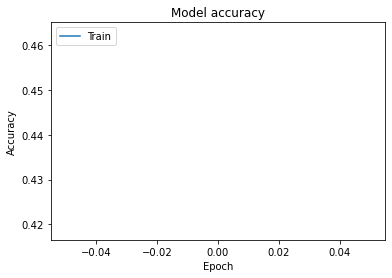

In [30]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

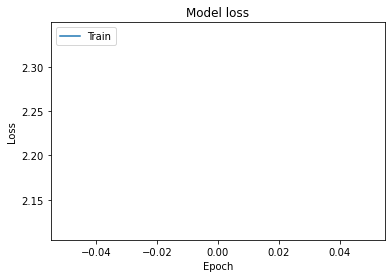

In [31]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [19]:
#print("{}: {}".format(model.metrics_names[0], metrics[0]))
#print("{}: {}".format(model.metrics_names[1], metrics[1]))

In [29]:
test_eval = model.evaluate(test_padded, test_label_seq, verbose=2)

4024/1 - 27s - loss: 4.9551 - accuracy: 0.1252


In [42]:
y_pred = model.predict(test_padded)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_label_seq, y_pred_bool)) #https://scikit-learn.org/stable/modules/model_evaluation.html


              precision    recall  f1-score   support

           1       0.18      0.06      0.09      1087
           2       0.23      0.48      0.31       719
           3       0.03      0.02      0.02       280
           4       0.02      0.02      0.02       189
           5       0.07      0.13      0.09       179
           6       0.04      0.38      0.07       149
           7       0.06      0.04      0.05       131
           8       0.04      0.01      0.01       117
           9       0.00      0.00      0.00        89
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00        56
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        36
          16       0.00      0.00      0.00        35
          17       0.00      0.00      0.00        34
          18       0.00    

/home/abner/miniconda3/envs/outro_um/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abner/miniconda3/envs/outro_um/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abner/miniconda3/envs/outro_um/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [52]:
# Print f1, precision, and recall scores
print(precision_score(test_label_seq, y_pred_bool , average="macro"))
print(recall_score(test_label_seq, y_pred_bool , average="macro"))
print(f1_score(test_label_seq, y_pred_bool , average="macro"))
print(accuracy_score(test_label_seq, y_pred_bool ))



0.0075128107759242675
0.012385011823366543
0.007412470731006351
0.12524850894632206


/home/abner/miniconda3/envs/outro_um/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
